In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret


# turn of warning
import warnings
warnings.filterwarnings("ignore")

In [47]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv', index_col='id')

df = df_train.drop(['id'], axis=1).reset_index()

In [48]:
df.head()

,index,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [49]:
from pycaret.classification import *

s = setup(df,
          target='NObeyesdad',
          session_id=123,
          experiment_name='obesity')

,Description,Value
0,Session id,123
1,Target,NObeyesdad
2,Target type,Multiclass
3,Target mapping,"Insufficient_Weight: 0, Normal_Weight: 1, Obesity_Type_I: 2, Obesity_Type_II: 3, Obesity_Type_III: 4, Overweight_Level_I: 5, Overweight_Level_II: 6"
4,Original data shape,"(20758, 18)"
5,Transformed data shape,"(20758, 27)"
6,Transformed train set shape,"(14530, 27)"
7,Transformed test set shape,"(6228, 27)"
8,Ordinal features,5
9,Numeric features,9


In [50]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9015,0.9896,0.9015,0.9015,0.9013,0.8845,0.8846,2.1080
gbc,Gradient Boosting Classifier,0.8999,0.9891,0.8999,0.8998,0.8996,0.8826,0.8827,3.0880
rf,Random Forest Classifier,0.8909,0.9872,0.8909,0.8913,0.8904,0.8720,0.8722,0.2530
et,Extra Trees Classifier,0.8666,0.9819,0.8666,0.8668,0.8660,0.8435,0.8437,0.2050
dt,Decision Tree Classifier,0.8399,0.9078,0.8399,0.8404,0.8400,0.8123,0.8123,0.0590
lda,Linear Discriminant Analysis,0.8221,0.9743,0.8221,0.8205,0.8204,0.7913,0.7916,0.0450
qda,Quadratic Discriminant Analysis,0.7017,0.9414,0.7017,0.7089,0.6826,0.6494,0.6559,0.0450
nb,Naive Bayes,0.6785,0.9449,0.6785,0.6846,0.6628,0.6219,0.6289,0.0420
ridge,Ridge Classifier,0.6398,0.0000,0.6398,0.6299,0.6051,0.5752,0.5830,0.0400
lr,Logistic Regression,0.4374,0.8055,0.4374,0.4266,0.4075,0.3343,0.3396,0.6640


In [52]:
best

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

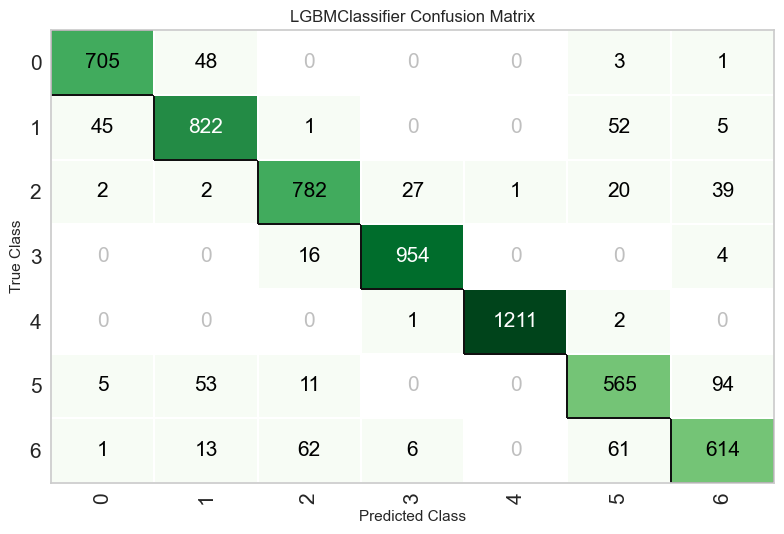

In [54]:
plot_model(best, plot='confusion_matrix')

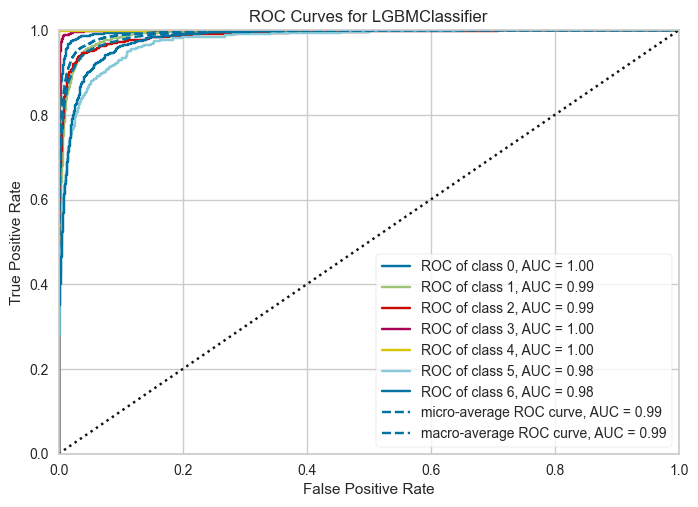

In [55]:
# plot AUC
plot_model(best, plot = 'auc')

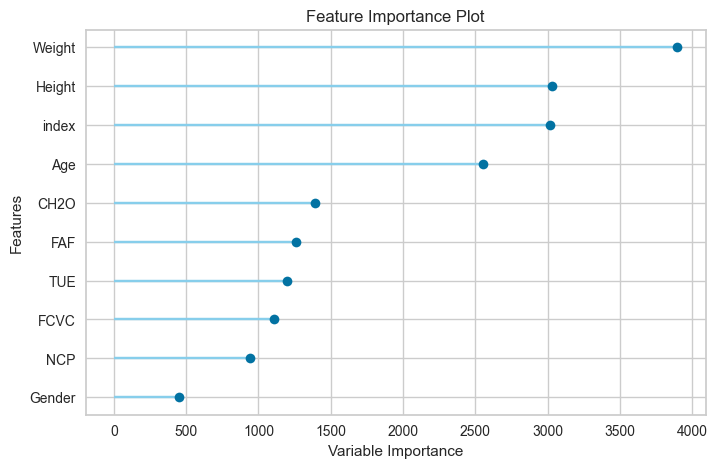

In [56]:
# plot feature importance
plot_model(best, plot = 'feature')

In [57]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [58]:
# predict on holdout
holdout = predict_model(best)
holdout.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9077,0.9910,0.9077,0.9072,0.9074,0.8917,0.8917


,index,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,prediction_label,prediction_score
17187,17187,Male,20.000000,1.750000,80.993370,yes,yes,2.0,3.0000,Sometimes,no,2.000000,no,2.891986,0.000000,no,Automobile,Overweight_Level_II,Overweight_Level_I,0.4956
16091,16091,Female,25.982113,1.627818,109.910011,yes,yes,3.0,3.0000,Sometimes,no,2.654636,no,0.043101,0.079334,Sometimes,Public_Transportation,Obesity_Type_III,Obesity_Type_III,0.9999
13445,13445,Male,18.869150,1.681080,79.621460,yes,yes,2.0,2.9948,Sometimes,no,2.000000,no,0.702839,1.409130,no,Public_Transportation,Overweight_Level_II,Overweight_Level_II,0.9467
17512,17512,Female,26.000000,1.623707,105.042191,yes,yes,3.0,3.0000,Sometimes,no,2.723159,no,0.000000,0.402075,Sometimes,Public_Transportation,Obesity_Type_III,Obesity_Type_III,0.9994
3405,3405,Male,19.000000,1.690000,50.000000,no,yes,2.0,4.0000,Sometimes,no,2.000000,no,2.000000,1.000000,no,Public_Transportation,Insufficient_Weight,Insufficient_Weight,0.9438


In [59]:
test = df_test.copy()
test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
id,,,,,,,,,,,,,,,,
20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [60]:
# reset id and rename it to index
test = test.reset_index().rename(columns={'id': 'index'})
test.head()


,index,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [61]:
predictions = predict_model(best, data=test)
predictions.head()

,index,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,prediction_label,prediction_score
0,20758,Male,26.899885,1.848294,120.644180,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation,Obesity_Type_II,0.9998
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_I,0.9251
2,20760,Female,26.000000,1.643355,111.600555,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation,Obesity_Type_III,1.0000
3,20761,Male,20.979254,1.553127,103.669113,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation,Obesity_Type_I,0.9930
4,20762,Female,26.000000,1.627396,104.835342,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation,Obesity_Type_III,0.9999


In [62]:
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['index', 'Age', 'Height', 'Weight',
                                              'FCVC', 'NCP', 'CH2O', 'FAF',
                                              'TUE'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               kee...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
      

In [63]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/hc/lcgvr8h11sq4z32r5nwftth80000gp/T/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['index', 'Age', 'Height', 'Weight',
                                             'FCVC', 'NCP', 'CH2O', 'FAF',
                                             'TUE'],
                                    transformer=SimpleIm...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=123,
                                reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

In [64]:
predictions.head()

,index,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,prediction_label,prediction_score
0,20758,Male,26.899885,1.848294,120.644180,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation,Obesity_Type_II,0.9998
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_I,0.9251
2,20760,Female,26.000000,1.643355,111.600555,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation,Obesity_Type_III,1.0000
3,20761,Male,20.979254,1.553127,103.669113,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation,Obesity_Type_I,0.9930
4,20762,Female,26.000000,1.627396,104.835342,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation,Obesity_Type_III,0.9999


In [65]:
predictions[['index', 'prediction_label']]\
    .rename(columns={'index': 'id', 'prediction_label': 'NObeyesdad'}) \
    .to_csv('data/submission6.csv', index=False)